Aluno: Felipe Miranda Cardoso de Sá
<br> Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

1-- Leia sobre Filtros Espaciais de Aguçamento utilizando derivadas de 2a Ordem (Gonzalez, 3.6.2, p. 105). Na última aula mostramos o uso da Equação 3.6-6 na deteção de bordas, uso do Laplaciano, etc. O Exemplo 3.15 fala de aguçamento usando o Laplaciano. Reproduza os resultados da Figura 3.38.;

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import math
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
moon = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0338(a)(blurry_moon).tif", cv2.IMREAD_GRAYSCALE)

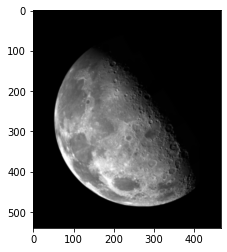

In [4]:
plt.figure(0)
plt.imshow(moon, cmap='gray')

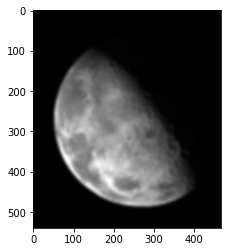

In [9]:
moon = cv2.GaussianBlur(moon,(5,5),0)
plt.imshow(moon, cmap='gray')

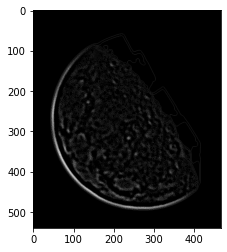

In [16]:
edges = cv2.Laplacian(moon, -1, ksize=3, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
plt.imshow(edges, cmap='gray')

2-- A suavização com kernel gaussiano com amostragens diversas pode ser cara computacionalmente. Mas kernels gaussianos são separáveis. Mostre que você consegue diminuir a complexidade computacional usando o conceito de separabilidade. Mostre as curvas de complexidade.

Processandom com o kernel Inteiro

In [26]:
gaussean_kernel = [
                  [1,2,1],
                  [2,4,2],
                  [1,2,1]
                  ]
gaussean_kernel = np.array(np.dot(gaussean_kernel, 1/16))
gaussean_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [28]:
def aplica_filtro(img, filtro):
  W, H = img.shape

  new_img = img.copy() 

  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))

  s = 1 / np.sum(filtro) #sum of filters coefficients

  for v in range(L, H - L):               # H - L - 1 (+1) 
    for u in range(K, W - K):             # W - K - 1 (+1)
                                      
      img_sum = 0
      for j in range(-L, L+1):            #[-L, ... , L]  
                    
        for i in range(-K, K+1):          #[-K, ... , K]
                 
          p = img[u+i, v+j]             #get pixel
          c = filtro[j+L-1][i+K-1]
          img_sum += (c * p)

      q = round(img_sum * s)

      #clampping
      if q < 0: q = 0
      elif q > 255: q = 255

      new_img[u, v] = q

  return new_img

In [42]:
moon.shape

(540, 466)

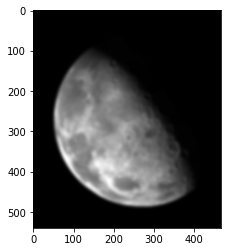

In [30]:
gaussean_moon = aplica_filtro(moon, gaussean_kernel)
plt.imshow(gaussean_moon, cmap='gray')

Processando com kernels separaveis

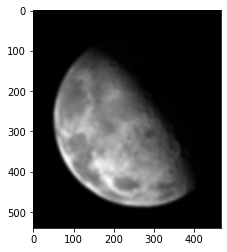

In [39]:
kernelx = np.dot([[1,2,1]], (1/4))
moon_x = aplica_filtro(moon, kernelx)

kernely = [
          [1],
          [2],
          [1],
          ]
          
kernely = np.dot(kernely, (1/4))
moon_xy_gaussean = aplica_filtro(moon_x, kernely)
plt.imshow(moon_xy_gaussean, cmap='gray')

In [88]:
def montarFiltroGaussiano(m,n, sigma):
  # chamada ex.: h = montarFiltroGaussiano(3,3,3)
  # iniciliza o filtro h
  h = np.zeros((m,n), dtype = np.float32)

  # calcula os deslocamentos
  a = (m-1)/2
  b = (n-1)/2

  for x in range(m):
        for y in range(n):
              h[x,y] = np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))

  h = h/np.sum(h)
  return h

In [126]:
timelist = []
for i in range(1, 20):
  one = np.ones((150, 150))
  random_array = np.dot(one, np.random.rand())
  gaussean_kernel = montarFiltroGaussiano(i,i, 3)
  start = time.time()
  aplica_filtro(random_array, gaussean_kernel)
  end = time.time()
  duration = end - start
  timelist.append(duration)

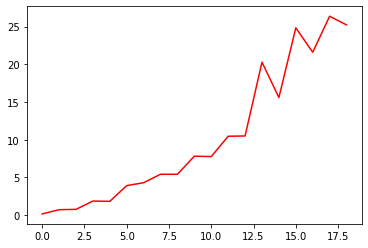

In [157]:
plt.plot(timelist, color = 'red')

In [128]:
timelist_separable = []
for i in range(1, 20):
  one = np.ones((150, 150))
  
  random_array = np.dot(one, np.random.rand())
  kernelx = montarFiltroGaussiano(1,i, 3)

  kernely = montarFiltroGaussiano(i,1, 3)

  start = time.time()
  aplica_filtro(aplica_filtro(random_array, kernelx), kernely)
  end = time.time()
  duration = end - start
  timelist_separable.append(duration)

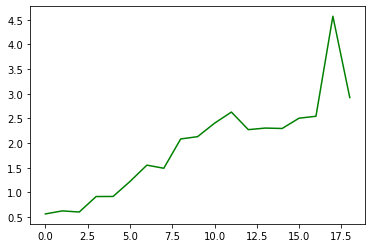

In [156]:
plt.plot(timelist_separable, color = 'green')

Notamos a performance adquirida ao utilizarmos filtros separáveis. Sendo o filtro separável com complexidade de O(LogN) e O filtro sem utilizar a separabilidade, com complexidade O(NLogN)

In [147]:
log_list = [np.log(x) for x in np.linspace(0,20)]
N_log_list = [(x * np.log(x)) for x in np.linspace(0,20)]
N2_list = [(x ** 2 ) for x in np.linspace(0,20)]
N_list = [x for x in np.linspace(0,20)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Comparação de O(LogN) (Em amarelo) e O(NLogN) (Em azul)

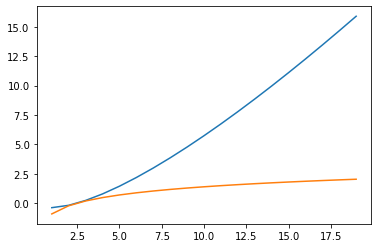

In [152]:
plt.plot(N_log_list[:20])
plt.plot(log_list[:20])

Comparação do Filtro sem separação (vermelho) e com separação (Verde)

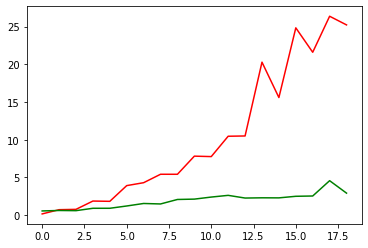

In [154]:
#plt.plot(N_log_list[:20])
#plt.plot(log_list[:20])
plt.plot(timelist, color = 'red')
plt.plot(timelist_separable, color = 'green')

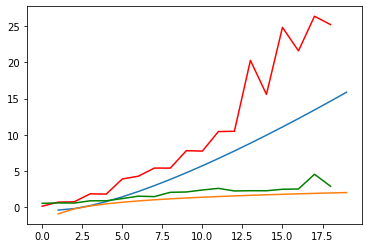

In [155]:
plt.plot(N_log_list[:20])
plt.plot(log_list[:20])
plt.plot(timelist, color = 'red')
plt.plot(timelist_separable, color = 'green')

3-- Estudamos Deteção de Bordas usando as máscaras de de Prewitt (suavização+derivação discreta de 1a ordem com ponderação idêntica). Ilustre o processo como um todo, calculando o gradiente e combinando com a limiarização (Gonzalez, p. 469). Use uma imagem de alta resolução (tons de cinza, ruído gaussiano) de sua preferência.

In [78]:
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)

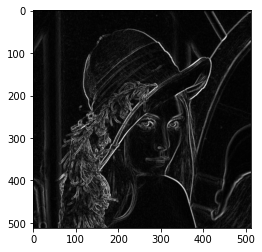

In [79]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(lena, cv2.CV_16S, kernelx)
y = cv2.filter2D(lena, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
lena_Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.imshow(lena_Prewitt, cmap='gray')

4-- Faça o mesmo usando as máscaras de Sobel. As máscaras de Sobel fazem uma melhor supressão do ruído?

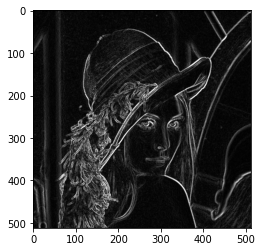

In [80]:
x = cv2.Sobel(lena, cv2.CV_16S, 1, 0) 
y = cv2.Sobel(lena, cv2.CV_16S, 0, 1) 
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
lena_Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.imshow(lena_Sobel, cmap='gray')

5-- Leia sobre técnicas avançadas para detecção de bordas (Gonzalez, p. 470). Na última aula mostramos vantagens e desvantagens dos métodos de 1a e 2a ordens. Implemente o algoritmo detetor de borda de Marr-Hildreth (p. 470-472) usando uma imagem em tons de cinza de alta resolução de sua preferência.

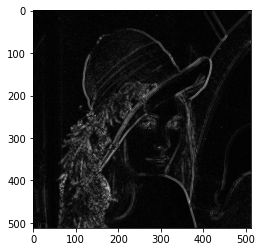

In [81]:
gaussian = cv2.GaussianBlur(lena, (3,3), 0)
# Then the edge detection is done by Laplace operator 
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)

plt.imshow(LOG, cmap='gray')